# Lab 10

List of airline:  ['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']


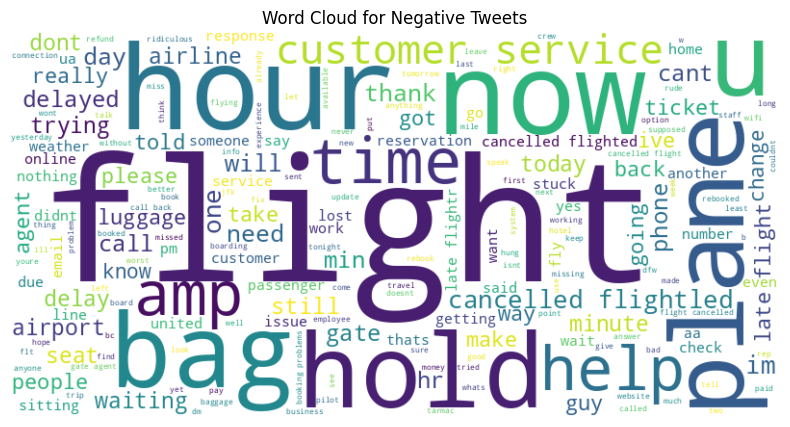

Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.77      0.83      1835
     neutral       0.51      0.72      0.60       620
    positive       0.68      0.68      0.68       473

    accuracy                           0.74      2928
   macro avg       0.69      0.72      0.70      2928
weighted avg       0.78      0.74      0.75      2928

Accuracy: 0.7438524590163934

Tweet: I'm so happy with the service from United!
→ Predicted Sentiment: positive

Tweet: This was the worst flight experience ever
→ Predicted Sentiment: negative

Tweet: The plane arrived late but the staff was okay.
→ Predicted Sentiment: negative

Tweet: Good food, staff were terrible.
→ Predicted Sentiment: negative

Tweet: Bad food, staff were good.
→ Predicted Sentiment: positive



In [11]:
# 1. Imports dep
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import re
import string

# 2. Load dataset (from tutorial)
url = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/Tweets.csv"
df = pd.read_csv(url)
# List airline in dataset
print("List of airline: ", df.airline.unique())

# 3. Keep relevant columns
df = df[['text', 'airline_sentiment']]
df = df[df['airline_sentiment'].isin(['positive', 'neutral', 'negative'])]

# 4. Preprocess tweets
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"#\w+", "", text)     # remove hashtags
    text = re.sub(r"[{}]".format(string.punctuation), "", text)  # remove punctuation
    text = re.sub(r"\d+", "", text)      # remove digits
    return text

df['clean_text'] = df['text'].apply(clean_text)

# 5. Word Cloud (plot figure)
all_words = ' '.join(df[df['airline_sentiment']=='negative']['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()

# 6. Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(df['clean_text'])
y = df['airline_sentiment']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 7. Balanced class weights and training
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# 8. Predictions
y_pred = model.predict(X_test)

# 9. Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")

# 10. Sample predictions again
sample_texts = [
    "I'm so happy with the service from United!",
    "This was the worst flight experience ever",
    "The plane arrived late but the staff was okay.",
    "Good food, staff were terrible.",  # Breakdown to see how it predicts these 2, seem like the second phrase is predominant
    "Bad food, staff were good."
]
sample_clean = [clean_text(t) for t in sample_texts]
sample_vec = tfidf.transform(sample_clean)
sample_preds = model.predict(sample_vec)

for text, pred in zip(sample_texts, sample_preds):
    print(f"Tweet: {text}\n→ Predicted Sentiment: {pred}\n")
